# Exploratory Data Analysis - Online Shoppers Dataset

This notebook explores the UCI Online Shoppers Purchasing Intention Dataset.

In [1]:
import sys

sys.path.append("..")  # Add parent directory to path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from src.data_loader import get_dataset_info, load_online_shoppers

# Plotting configuration
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 10

print("EDA Notebook for Online Shoppers Dataset")

EDA Notebook for Online Shoppers Dataset


## 1. Load Data

In [3]:
# Load dataset
X, y = load_online_shoppers()
get_dataset_info(X, y)

DATASET INFORMATION

Features Shape: (12330, 17)
Target Shape: (12330,)

Feature Types:
Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
dtype: object

Missing Values:
No missing values

Target Distribution (Revenue):
Revenue
False    10422
True      1908
Name: count, dtype: int64

Proportions:
Revenue
False    0.8453
True     0.1547
Name: proportion, dtype: float64

Class Imbalance Ratio: 5.46:1

Numeric Features Summary:
       Administrative  Admi

/app/notebooks/../src/data_loader.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nClass Imbalance Ratio: {y.value_counts()[0] / y.value_counts()[1]:.2f}:1")


## 2. Target Distribution

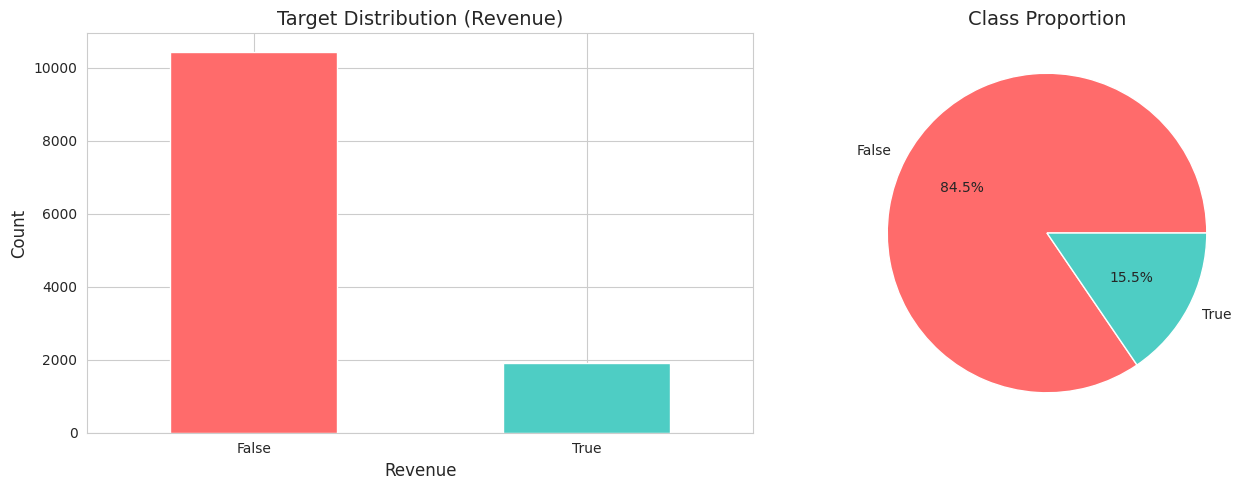

Class imbalance ratio: 5.46:1


In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
y.value_counts().plot(kind="bar", ax=axes[0], color=["#FF6B6B", "#4ECDC4"])
axes[0].set_title("Target Distribution (Revenue)", fontsize=14)
axes[0].set_xlabel("Revenue", fontsize=12)
axes[0].set_ylabel("Count", fontsize=12)
axes[0].tick_params(axis="x", rotation=0)

# Pie chart
y.value_counts().plot(kind="pie", ax=axes[1], autopct="%1.1f%%", colors=["#FF6B6B", "#4ECDC4"])
axes[1].set_ylabel("")
axes[1].set_title("Class Proportion", fontsize=14)

plt.tight_layout()
plt.show()

print(f"Class imbalance ratio: {y.value_counts().iloc[0] / y.value_counts().iloc[1]:.2f}:1")

## 3. Numeric Features Distribution

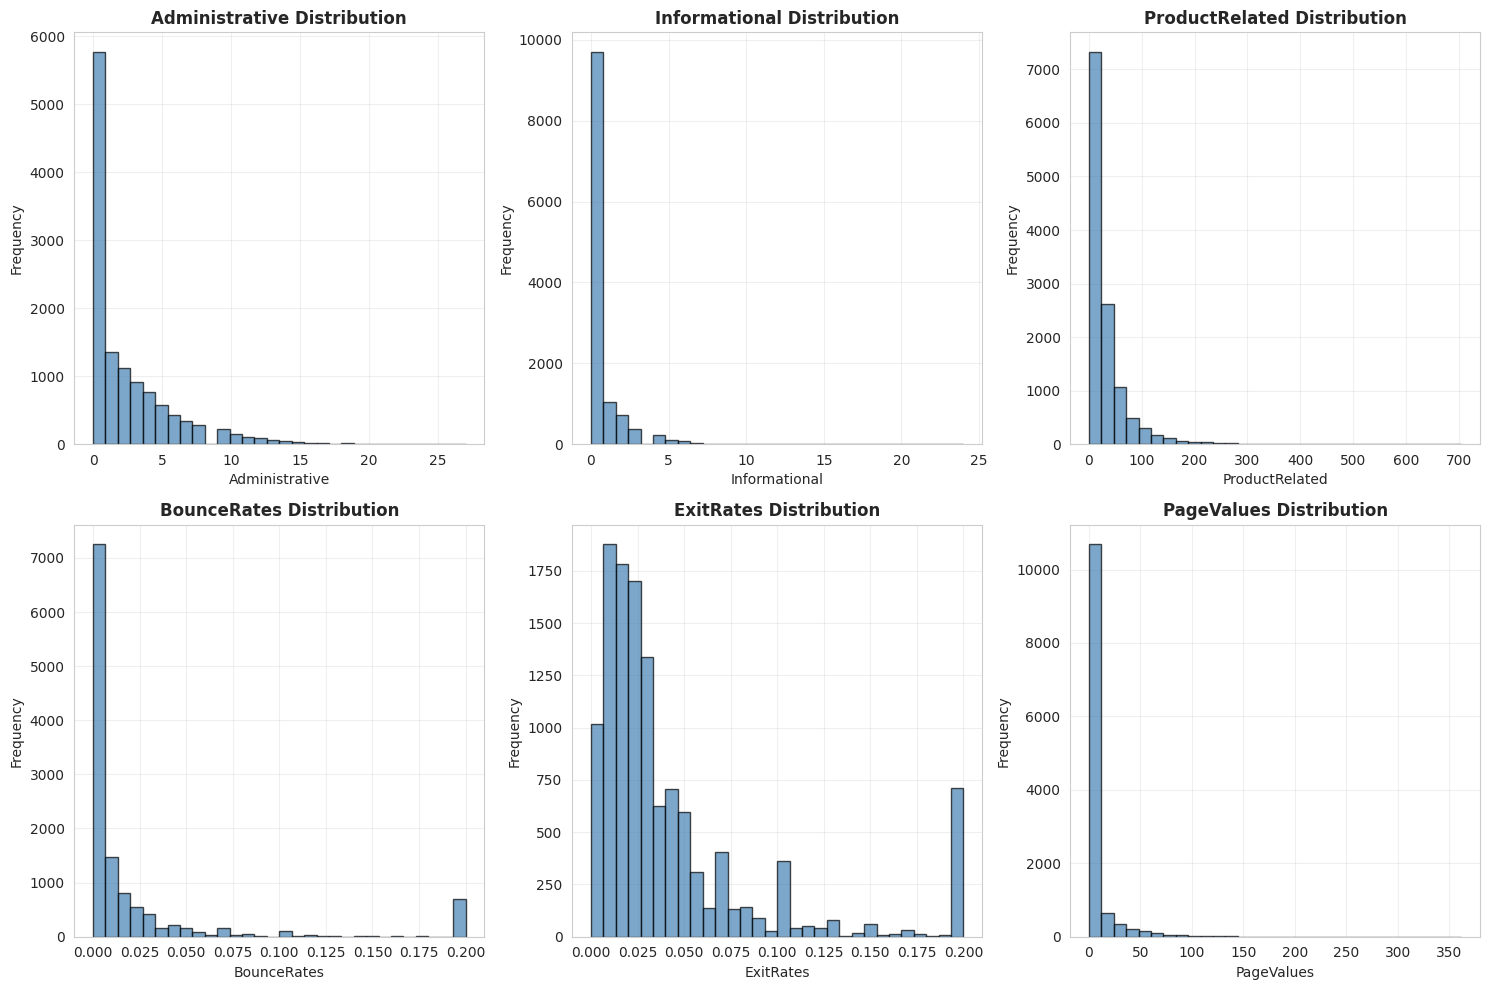

In [5]:
# Top 6 numeric features
numeric_cols = [
    "Administrative",
    "Informational",
    "ProductRelated",
    "BounceRates",
    "ExitRates",
    "PageValues",
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    X[col].hist(bins=30, ax=axes[idx], edgecolor="black", alpha=0.7, color="steelblue")
    axes[idx].set_title(f"{col} Distribution", fontsize=12, fontweight="bold")
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel("Frequency", fontsize=10)
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Correlation Matrix

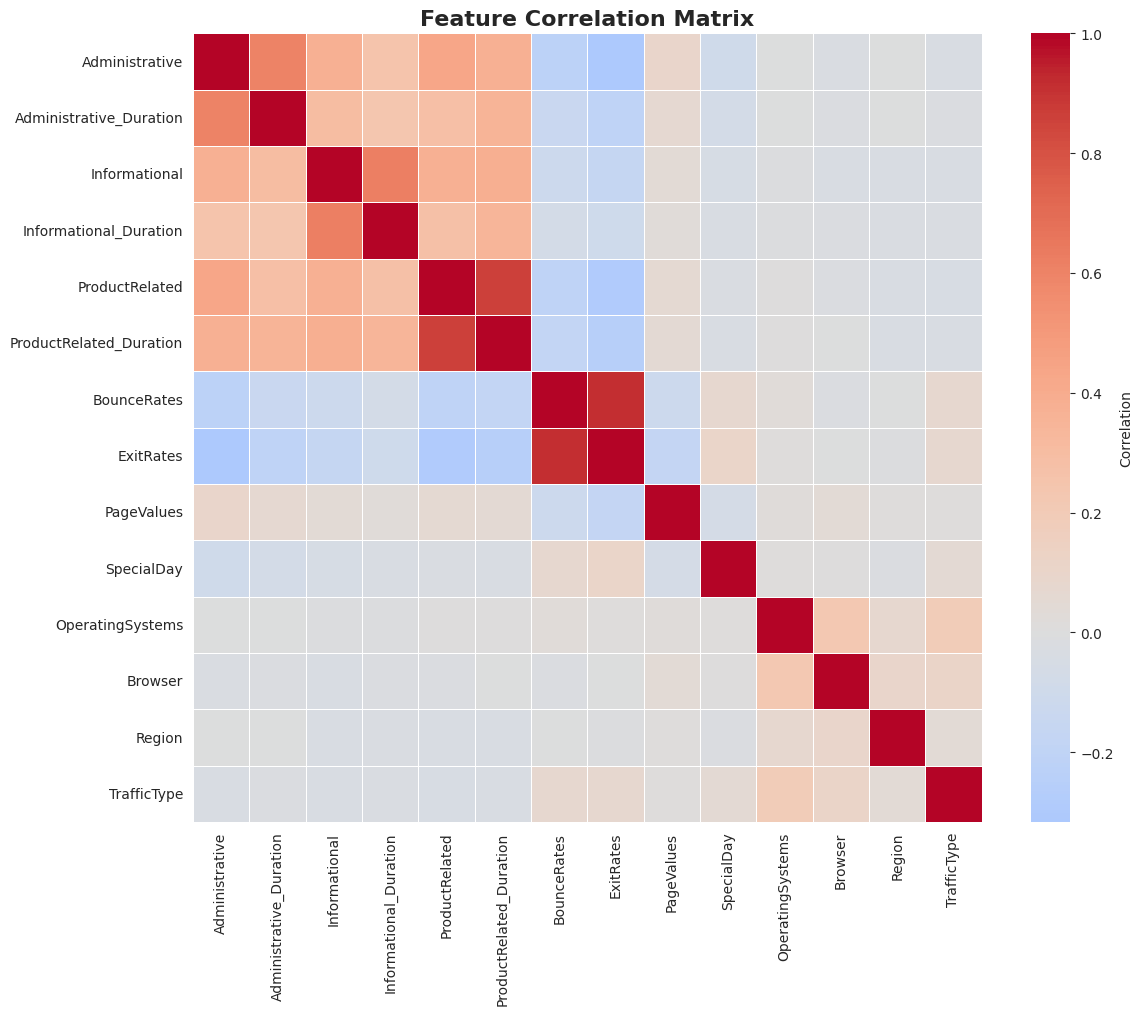


Top 5 Feature Correlations:
BounceRates              ExitRates                  0.913004
ExitRates                BounceRates                0.913004
ProductRelated_Duration  ProductRelated             0.860927
ProductRelated           ProductRelated_Duration    0.860927
Informational_Duration   Informational              0.618955
dtype: float64


In [6]:
# Correlation matrix for numeric features
numeric_features = X.select_dtypes(include=[np.number])
corr_matrix = numeric_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=False,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"label": "Correlation"},
)
plt.title("Feature Correlation Matrix", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

# Show top correlations
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs != 1.0]
corr_pairs = corr_pairs.sort_values(ascending=False)
print("\nTop 5 Feature Correlations:")
print(corr_pairs.head(5))

## 5. Categorical Features

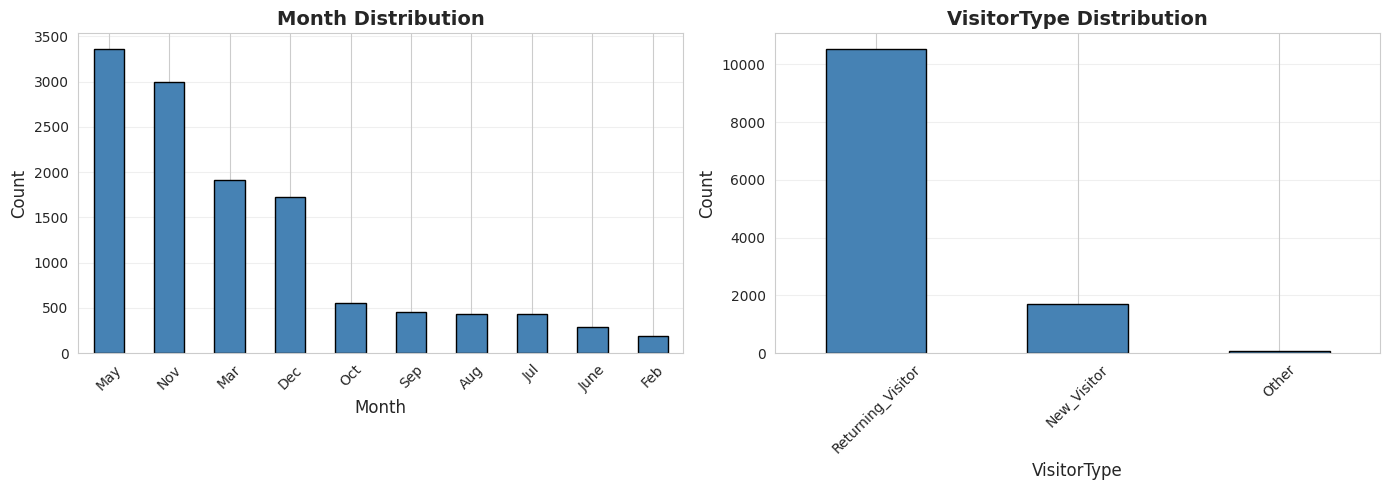

In [7]:
categorical_cols = ["Month", "VisitorType"]
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, col in enumerate(categorical_cols):
    value_counts = X[col].value_counts()
    value_counts.plot(kind="bar", ax=axes[idx], color="steelblue", edgecolor="black")
    axes[idx].set_title(f"{col} Distribution", fontsize=14, fontweight="bold")
    axes[idx].set_xlabel(col, fontsize=12)
    axes[idx].set_ylabel("Count", fontsize=12)
    axes[idx].tick_params(axis="x", rotation=45)
    axes[idx].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Feature vs Target Analysis

<Figure size 1000x600 with 0 Axes>

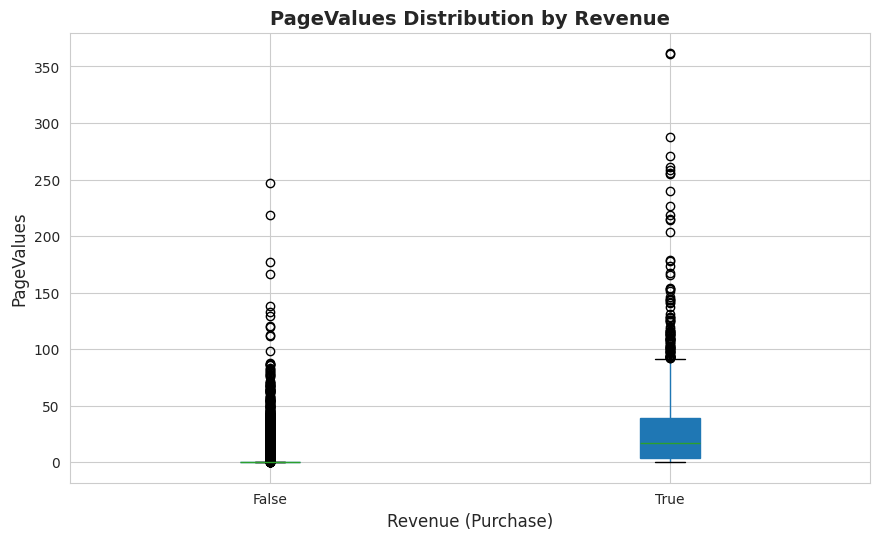


PageValues Statistics by Revenue:
           count       mean        std  min       25%        50%        75%  \
Revenue                                                                       
False    10422.0   1.975998   9.072424  0.0  0.000000   0.000000   0.000000   
True      1908.0  27.264518  35.191954  0.0  3.641144  16.758134  38.897742   

                max  
Revenue              
False    246.758590  
True     361.763742  


In [8]:
# PageValues vs Revenue (key discriminative feature)
X_with_target = X.copy()
X_with_target["Revenue"] = y

plt.figure(figsize=(10, 6))
X_with_target.boxplot(column="PageValues", by="Revenue", figsize=(10, 6), patch_artist=True)
plt.suptitle("")
plt.title("PageValues Distribution by Revenue", fontsize=14, fontweight="bold")
plt.xlabel("Revenue (Purchase)", fontsize=12)
plt.ylabel("PageValues", fontsize=12)
plt.show()

# Compare means
print("\nPageValues Statistics by Revenue:")
print(X_with_target.groupby("Revenue")["PageValues"].describe())

## 7. Summary Statistics

In [9]:
print("=" * 80)
print("DATASET SUMMARY")
print("=" * 80)
print(f"Total samples: {len(X):,}")
print(f"Total features: {X.shape[1]}")
print(f"Numeric features: {len(X.select_dtypes(include=[np.number]).columns)}")
print(f"Categorical features: {len(X.select_dtypes(include=['object', 'bool']).columns)}")
print("\nClass distribution:")
print(f"  No Purchase: {(~y).sum():,} ({(~y).sum() / len(y) * 100:.2f}%)")
print(f"  Purchase: {y.sum():,} ({y.sum() / len(y) * 100:.2f}%)")
print(f"\nClass imbalance ratio: {(~y).sum() / y.sum():.2f}:1")
print(f"Missing values: {X.isnull().sum().sum()}")
print("=" * 80)

DATASET SUMMARY
Total samples: 12,330
Total features: 17
Numeric features: 14
Categorical features: 3

Class distribution:
  No Purchase: 10,422 (84.53%)
  Purchase: 1,908 (15.47%)

Class imbalance ratio: 5.46:1
Missing values: 0
